# GreekStockPortfolio



### 4. Stock Financial Ratio Analysis

---


### Ratio Analysis

In [ ]:
def mean_price_for_year(ticker, year):
    """
    Calculates the mean stock price for a given ticker symbol during a specific year.

    This function retrieves historical stock data for the specified year and computes the average price.

    Parameters:
    ticker (str): The ticker symbol of the stock.
    year (int): The year for which to calculate the mean price.

    Returns:
    tuple: A tuple containing:
        - float: The mean stock price for the specified year.
        - pd.DataFrame: A DataFrame with the historical stock data for the specified year.
    """
    end_date=dt.datetime(year, 12, 31)
    start_date = end_date - dt.timedelta(days=366)
    # Download historical data for the stock
    historical = yf.download([ticker], start=start_date, end=end_date)
    historical = historical.sort_values(by='Date')
    historical = historical.interpolate(method='linear', axis=0)

    # Calculate the mean price (you can choose 'Close', 'Open', etc.)
    mean_price = historical['Close'].mean()

    return mean_price,historical

In [ ]:
def ratios_analysis(df,date):
  """
    Analyzes various financial ratios for stock tickers in a DataFrame for a specific year.

    This function calculates and appends several financial ratios to the DataFrame, including market value ratios,
    liquidity ratios, solvency ratios, and profitability ratios for the given year. It adds columns to the DataFrame
    for liquidity, capitalization, and other calculated ratios.

    Parameters:
    df (pd.DataFrame): A DataFrame containing stock tickers under the column 'Ticker'.
    date (int): The year for which to calculate the financial ratios.

    Returns:
    pd.DataFrame: The input DataFrame with additional columns for each calculated financial ratio.
    """
  str_date=str(date)
  #liquidity
  VOL_list=[]
  for i in df['Ticker']:
      price,data=mean_price_for_year(i,date)
      stock=yf.Ticker(i)
      volume_3month_data_mean=data['Volume'].tail(90).mean()
      nos=stock.balance_sheet.loc['Ordinary Shares Number']
      nos=nos[str_date]
      liquidity=volume_3month_data_mean/nos
      VOL_list.append(liquidity.iloc[0])
  df['Liquidity']=pd.Series(VOL_list)


  #Capitalization
  CAP_list=[]
  for i in df['Ticker']:
      price,data=mean_price_for_year(i,date)
      stock=yf.Ticker(i)
      nos=stock.balance_sheet.loc['Ordinary Shares Number']
      nos=nos[str_date]
      capitalization=nos*price
      CAP_list.append(capitalization.iloc[0])
  df['Capitalization']=pd.Series(CAP_list)





#Market Value Ratios
  #Price to Earnings
  PE_list=[]
  for i in df['Ticker']:
      price,data=mean_price_for_year(i,date )
      stock=yf.Ticker(i)
      eps=stock.income_stmt.loc['Basic EPS']
      eps=eps[str_date]
      pe=price/eps
      PE_list.append(pe.iloc[0])
  df['P/E']=pd.Series(PE_list)

  #Price to Book Value
  PBV_list=[]
  for i in df['Ticker']:
      price,data=mean_price_for_year(i,date )
      stock=yf.Ticker(i)
      BV=stock.balance_sheet.loc['Total Assets']-stock.balance_sheet.loc['Total Liabilities Net Minority Interest']
      BV=BV[str_date]
      nos=stock.balance_sheet.loc['Ordinary Shares Number']
      nos=nos[str_date]
      BVPS=BV/nos
      PBV=price/BVPS
      PBV_list.append(PBV.iloc[0])
  df['PBV']=pd.Series(PBV_list)

#Liquidity (current & quick ratios)
  CUR_list=[]
  QUI_list=[]
  for i in df['Ticker']:
      stock=yf.Ticker(i)

      try:

          current_ratio=stock.balance_sheet.loc['Current Assets']/stock.balance_sheet.loc['Current Liabilities']
          current_ratio=current_ratio[str_date]
          CUR_list.append(current_ratio.iloc[0])
      except:
          CUR_list.append(np.nan)
      try:
          quick_ratio=(stock.balance_sheet.loc['Current Assets']-stock.balance_sheet.loc['Inventory'])/stock.balance_sheet.loc['Current Liabilities']
          quick_ratio=quick_ratio[str_date]
          QUI_list.append(quick_ratio.iloc[0])
      except:
          QUI_list.append(np.nan)
  df['Current Ratio']=pd.Series(CUR_list)
  df['Quick Ratio']=pd.Series(QUI_list)

#Solvency
  DE_list=[]
  DA_list=[]
  for i in df['Ticker']:
      stock=yf.Ticker(i)

      try:

          de=stock.balance_sheet.loc['Total Debt']/stock.balance_sheet.loc['Total Equity Gross Minority Interest']
          de=de[str_date]
          DE_list.append(de.iloc[0])
      except:
          DE_list.append(np.nan)
      try:
          da=stock.balance_sheet.loc['Total Debt']/stock.balance_sheet.loc['Total Assets']
          da=da[str_date]
          DA_list.append(da.iloc[0])
      except:
          DA_list.append(np.nan)
  df['Debt to Equity']=pd.Series(DE_list)
  df['Debt to Assets']=pd.Series(DA_list)

#Profitability
  ROA_list=[]
  ROE_list=[]
  for i in df['Ticker']:
      stock=yf.Ticker(i)

      try:

          roa=stock.income_stmt.loc['EBIT']/stock.balance_sheet.loc['Total Assets']
          roa=roa[str_date]
          ROA_list.append(roa.iloc[0])
      except:
          ROA_list.append(np.nan)
      try:
          roe=stock.income_stmt.loc['Net Income']/stock.balance_sheet.loc['Total Equity Gross Minority Interest']
          roe=roe[str_date]
          ROE_list.append(roe.iloc[0])
      except:
          ROE_list.append(np.nan)
  df['Return On Assets']=pd.Series(ROA_list)
  df['Return On Equity']=pd.Series(ROE_list)

  return df

In [ ]:
df_ratios=ratios_analysis(df_clusters,2022)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
df_ratios

,Ticker,Volatility,Returns,Cluster,Sector,Liquidity,Capitalization,P/E,PBV,Current Ratio,Quick Ratio,Debt to Equity,Debt to Assets,Return On Assets,Return On Equity
0,ADMIE.AT,0.019513,0.000271,0,Utilities,0.000992,4.695221e+08,8.066710,0.328447,1.210309,1.151310,0.681382,0.275879,0.026235,0.040716
1,AEGN.AT,0.028841,0.000428,4,Industrials,0.000400,4.666761e+08,4.320898,1.340629,1.154954,1.106653,2.888531,0.497682,0.090892,0.310266
2,ALPHA.AT,0.036142,-0.000135,1,Financial Services,0.002203,2.350092e+09,6.378600,0.375215,NaN,NaN,0.558906,0.044873,NaN,0.058771
3,AVAX.AT,0.032096,0.001341,1,Industrials,0.000490,1.171140e+08,3.073788,0.756012,1.061585,1.024613,2.471307,0.355636,0.036732,0.246012
4,BELA.AT,0.022772,0.000526,3,Consumer Cyclical,0.001694,1.950428e+09,7.845810,1.371742,6.203054,4.924347,0.197244,0.147640,0.162486,0.174842
5,CENER.AT,0.028240,0.001320,4,Industrials,0.000493,5.886752e+08,9.743603,1.723137,0.926277,0.490233,1.771996,0.356361,0.063746,0.176849
6,EEE.AT,0.020478,-0.000118,3,Consumer Defensive,0.000063,8.420848e+09,20.322035,2.487254,1.235973,0.979878,1.010131,0.346997,0.071167,0.122696
7,ELHA.AT,0.024278,0.000406,3,Industrials,0.000252,5.943632e+08,3.731414,0.607503,1.926551,0.661070,1.012655,0.391010,0.093766,0.162807
8,ELLAKTOR.AT,0.032991,0.000340,1,Industrials,0.000359,5.469094e+08,1.100401,0.598680,1.706946,1.678362,0.826423,0.307844,0.043874,0.544042
9,ELPE.AT,0.020183,0.000132,3,Energy,0.000355,2.063612e+09,2.320234,0.756622,0.953898,0.471661,1.118454,0.356280,0.177342,0.326135


### Beta

In [ ]:
def beta(df, index):
    """
    Calculates the beta value for each stock in the DataFrame relative to a specified market index.

    Beta measures a stock's volatility or systematic risk in comparison to the market index. This function computes
    beta values by fitting a linear regression between each stock's returns and the market index's returns. It also plots
    the relationship and the fitted line for each stock.

    Parameters:
    df (pd.DataFrame): A DataFrame containing stock returns with 'Date' as one of the columns and stock tickers as other columns.
    index (str): The column name representing the market index returns in the DataFrame.

    Returns:
    list: A list of beta values for each stock relative to the specified market index.
    """
    beta = []
    for i in df.columns:
        if i != 'Date' and i != index:

            # Plot scatter plot of stock returns vs. index returns
            df.plot(kind='scatter', x=index, y=i)

            # Fit a linear regression line to the data
            b, a = np.polyfit(df[index], df[i], 1)

            # Plot the regression line on the scatter plot
            plt.plot(df[index], b * df[index] + a, '-', color='r')
            beta.append(b)
            plt.show()

    return beta


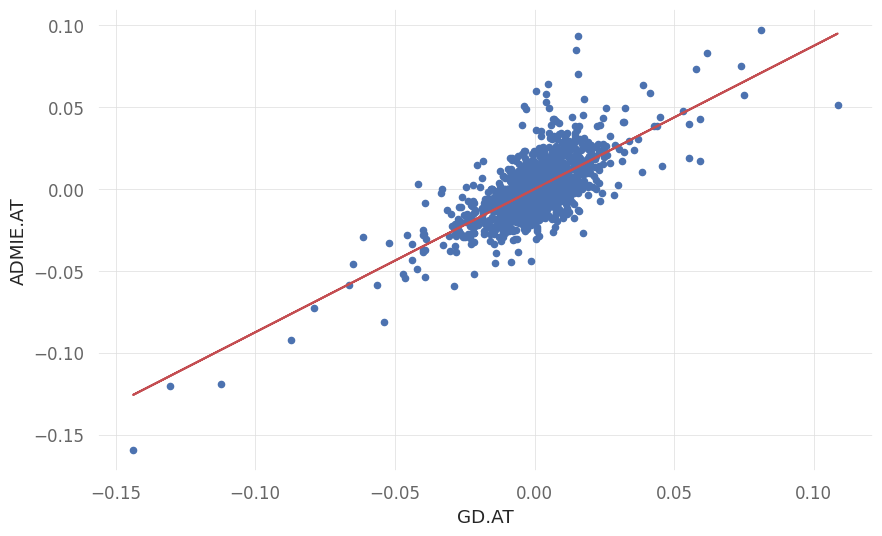

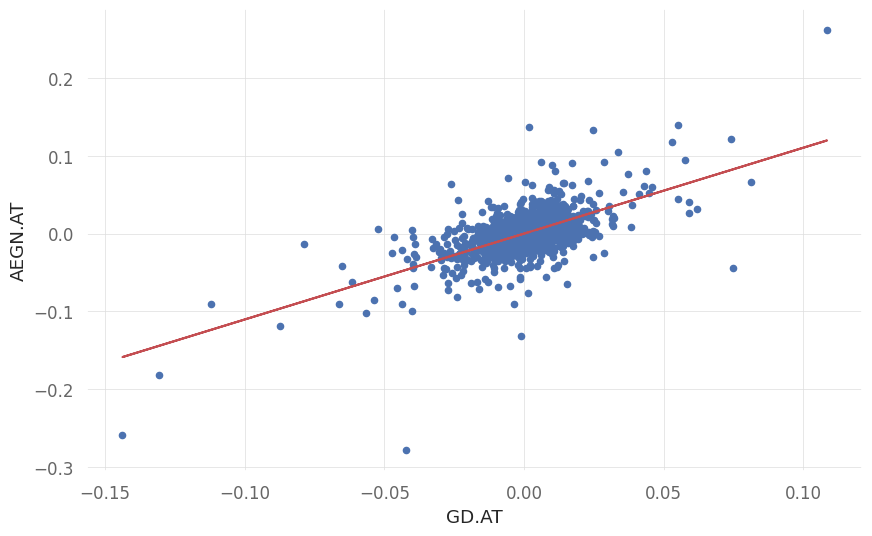

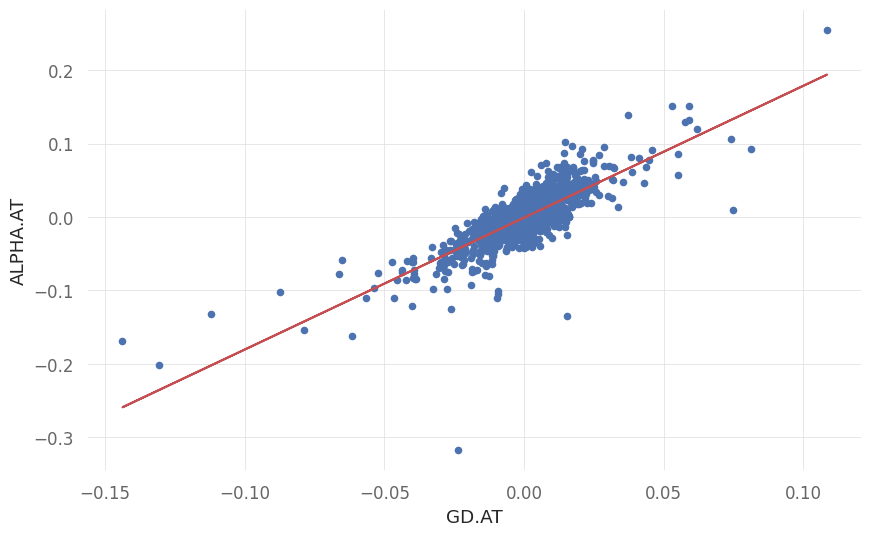

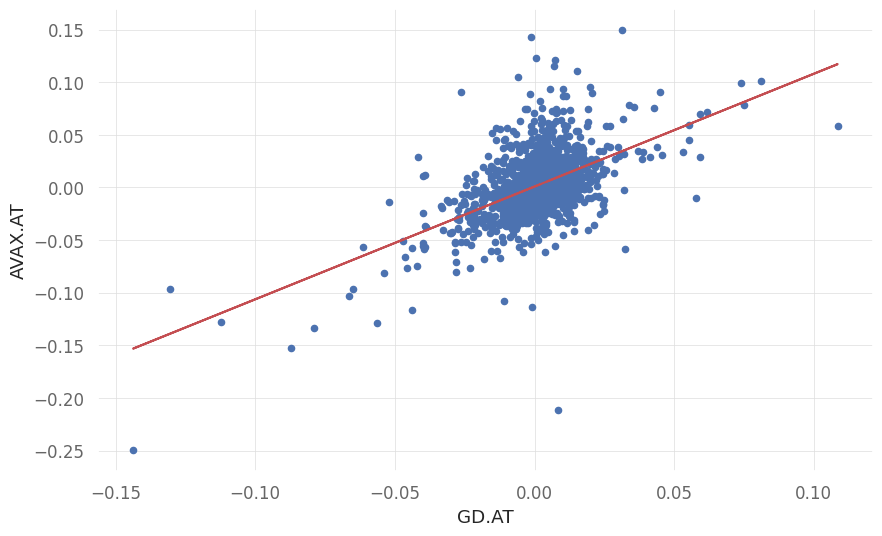

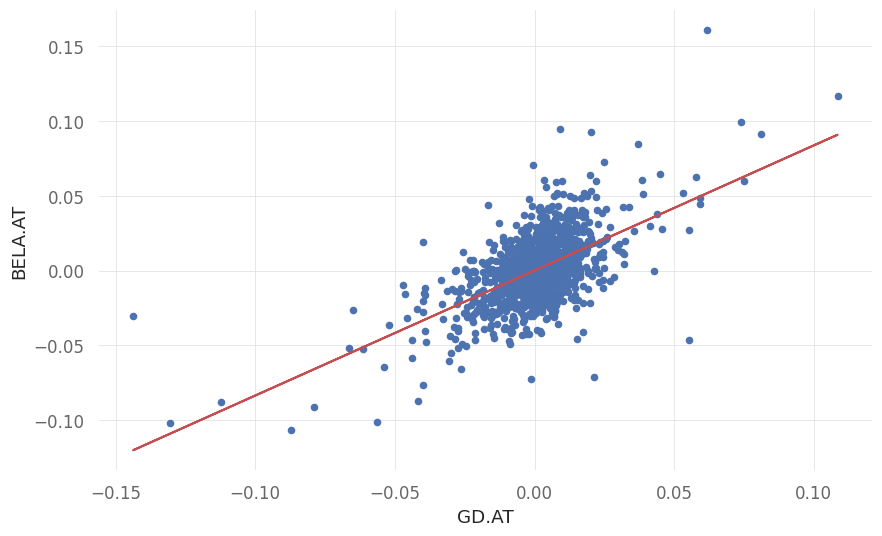

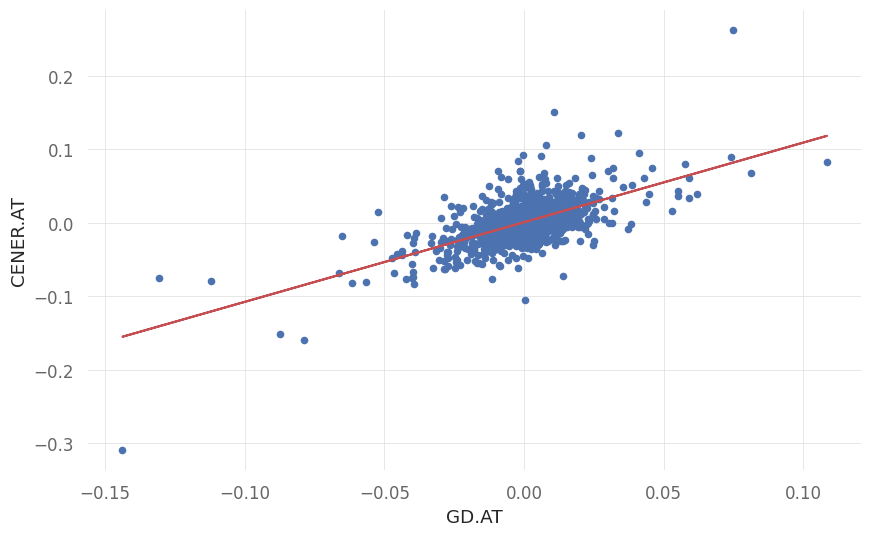

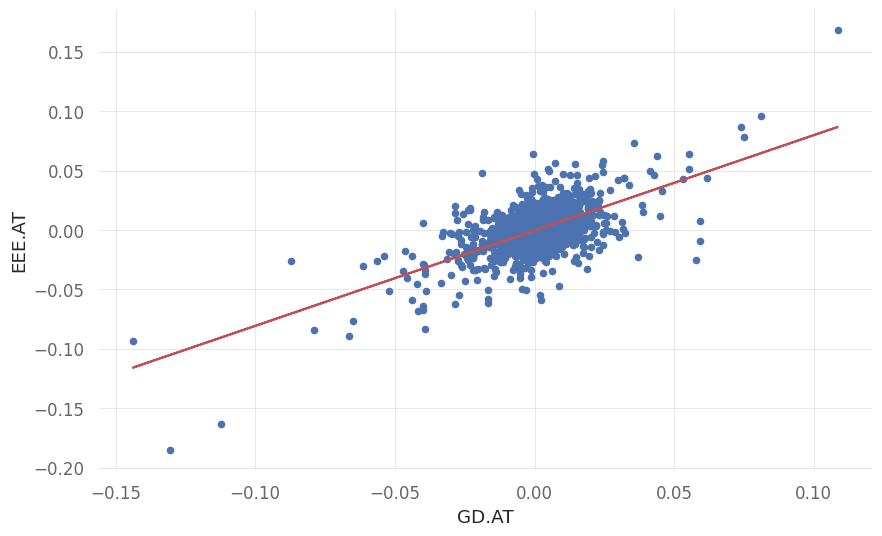

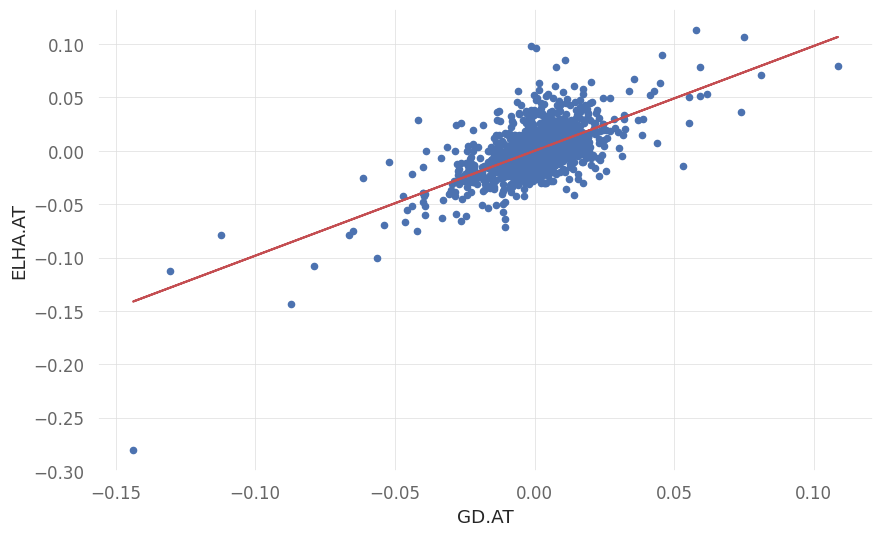

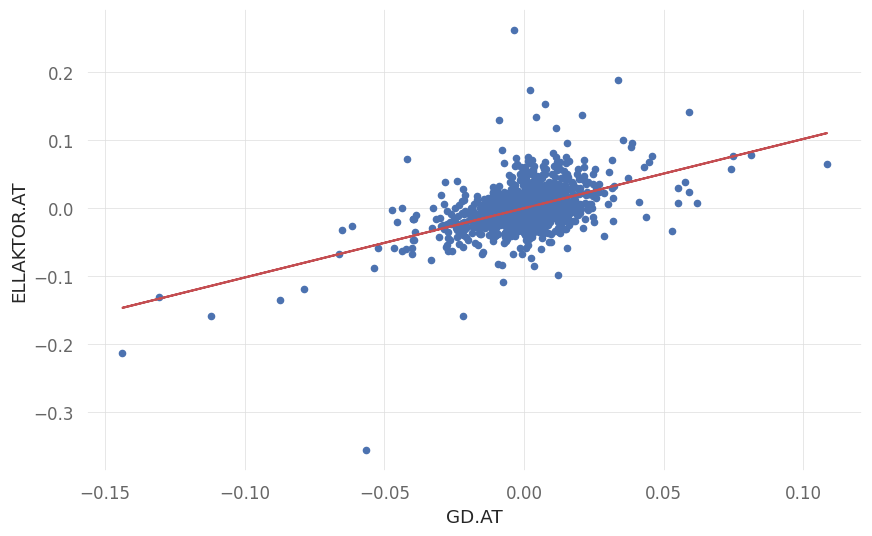

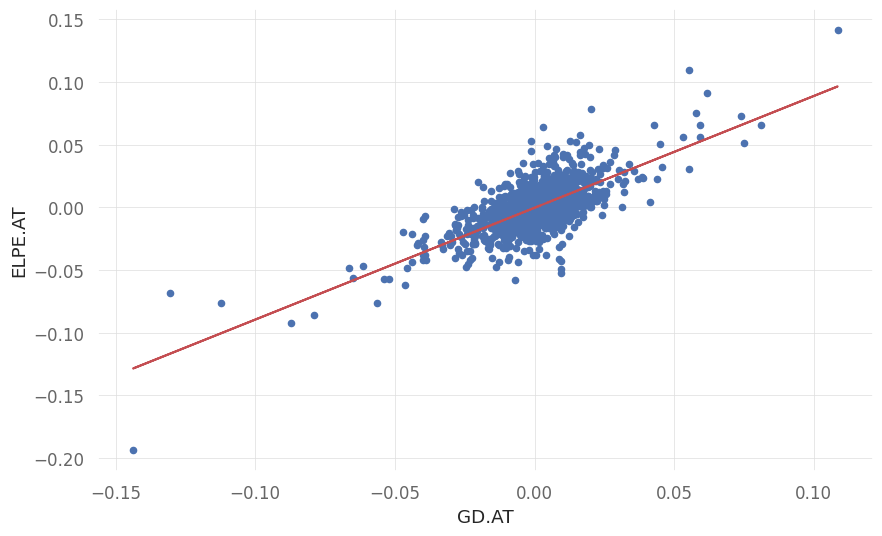

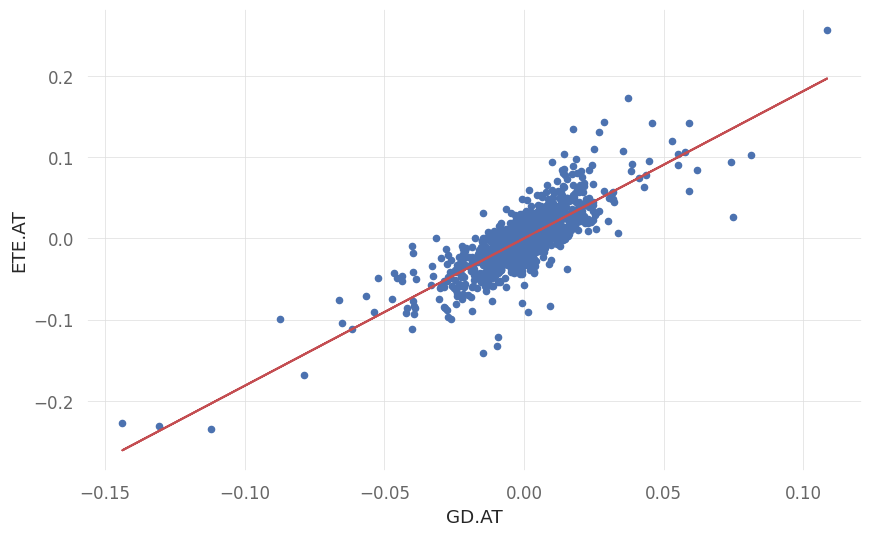

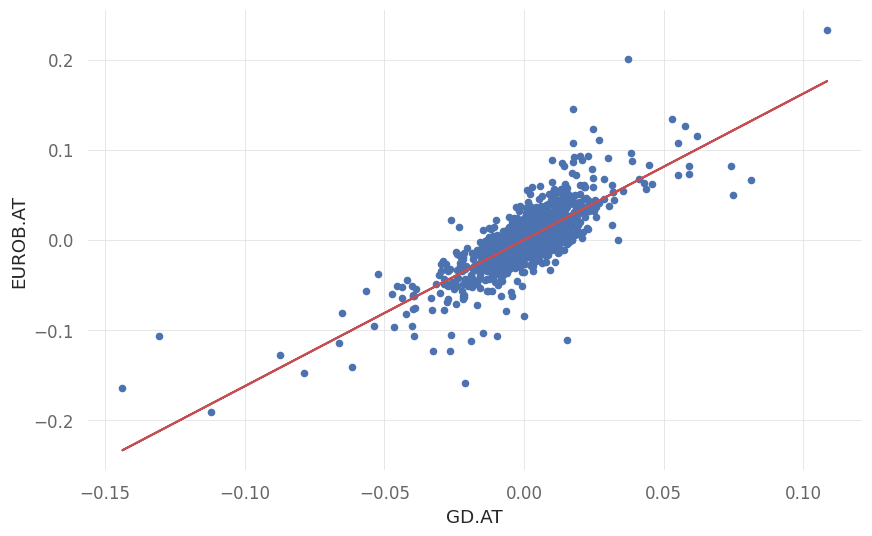

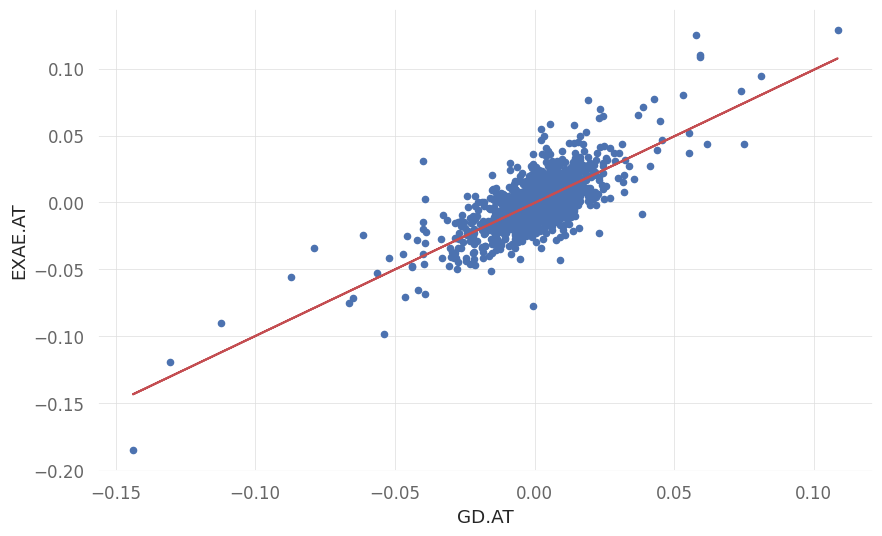

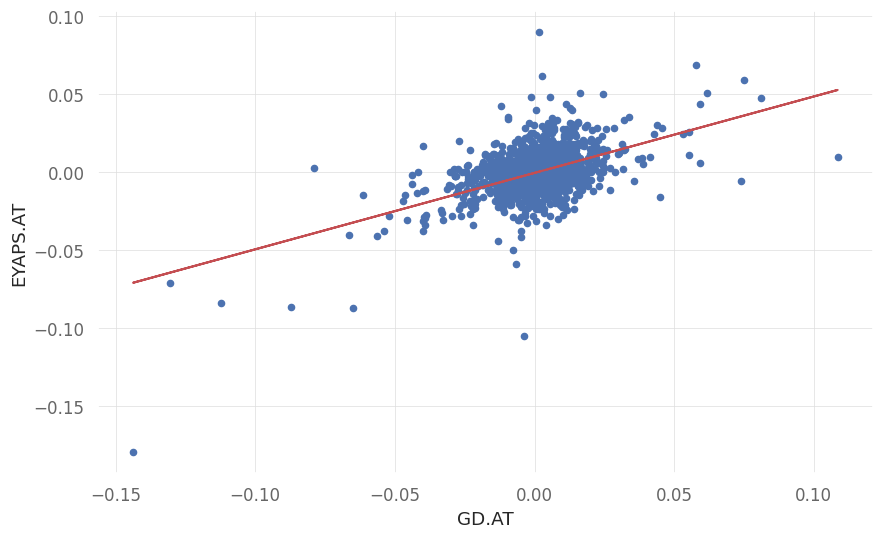

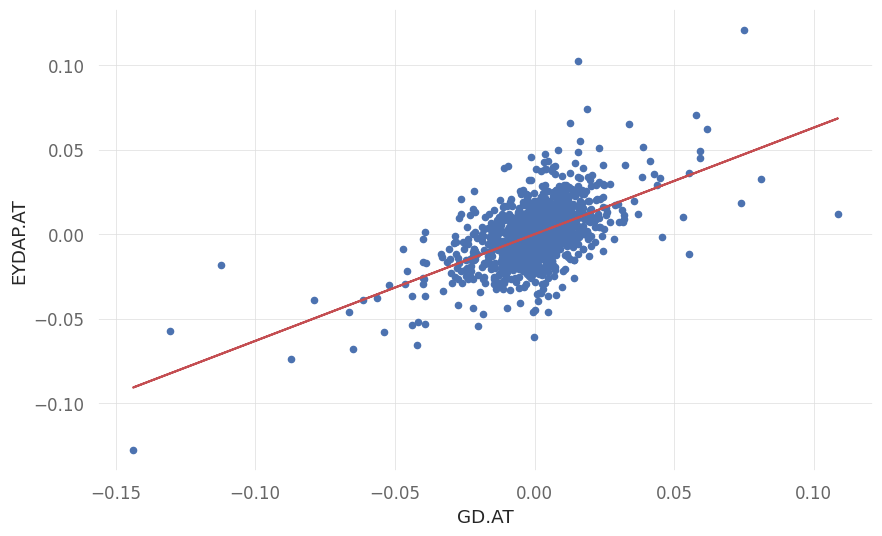

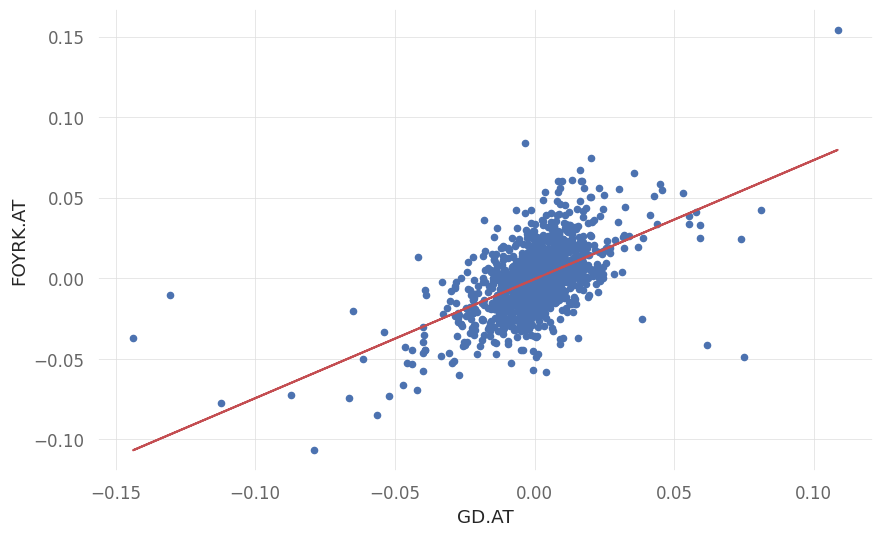

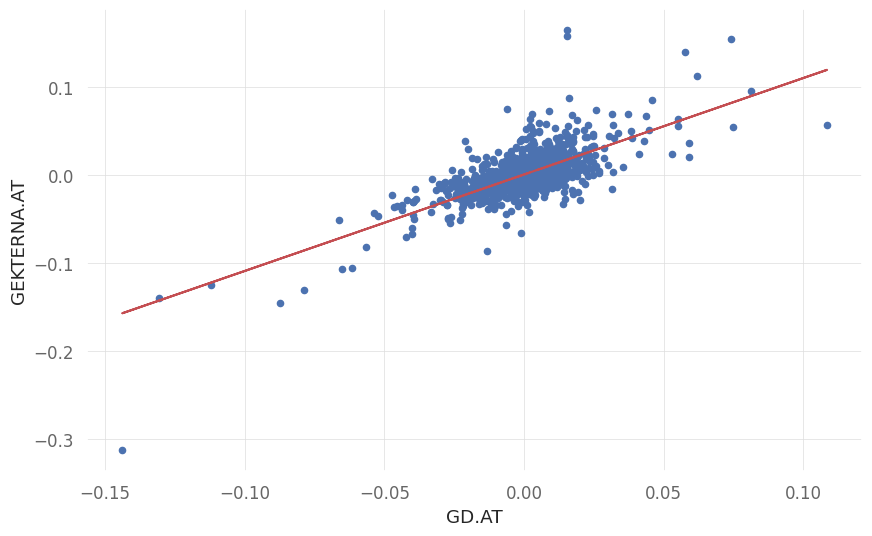

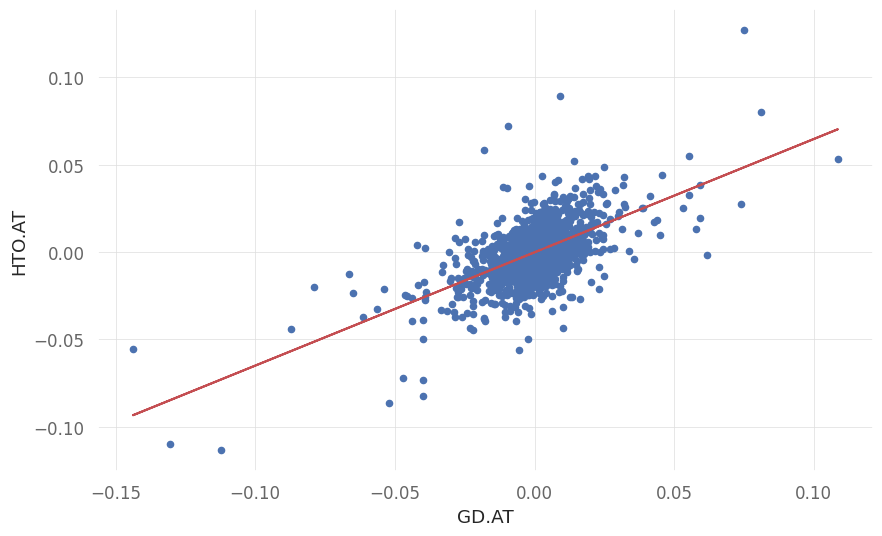

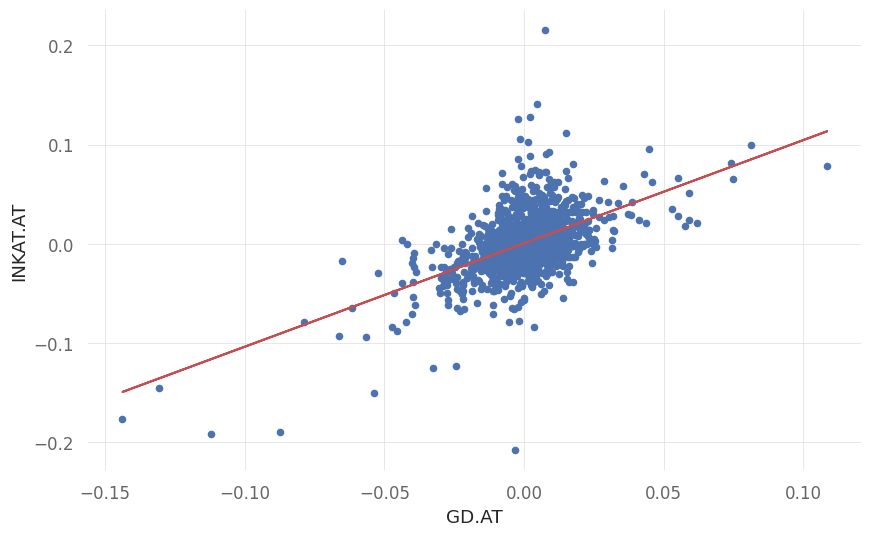

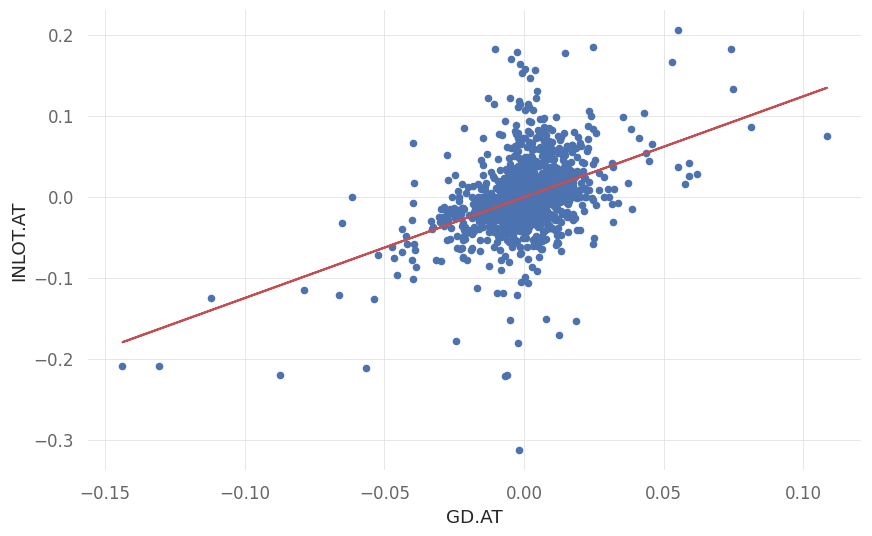

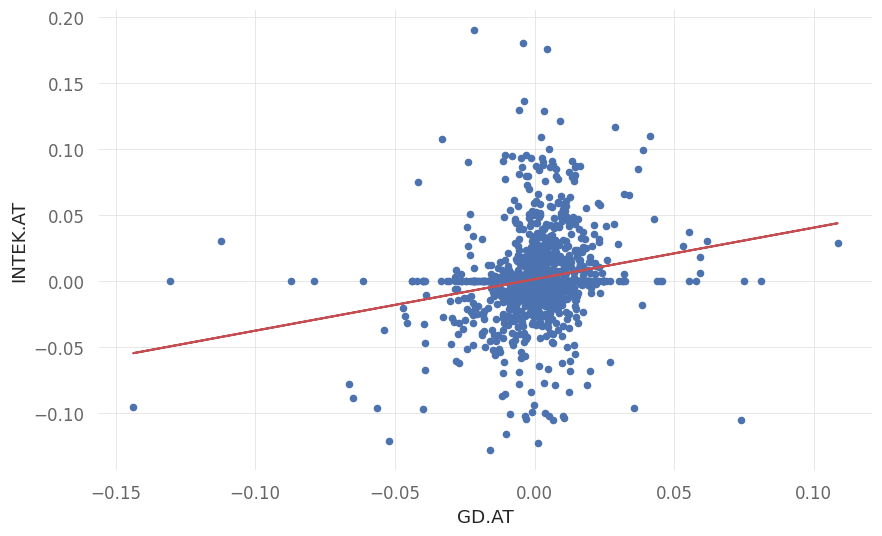

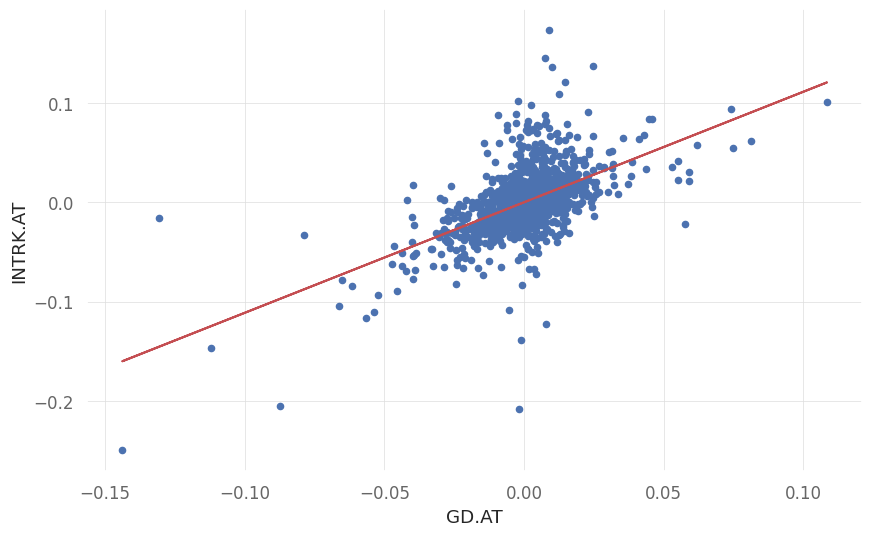

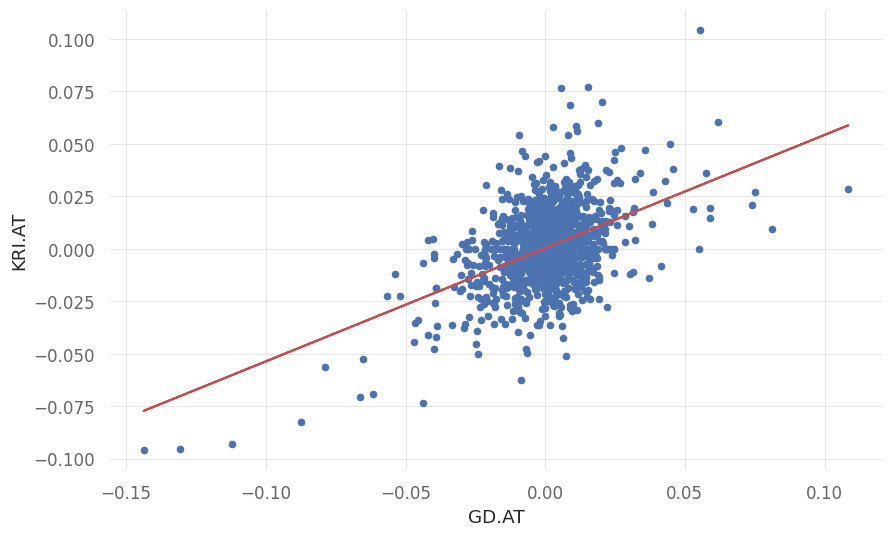

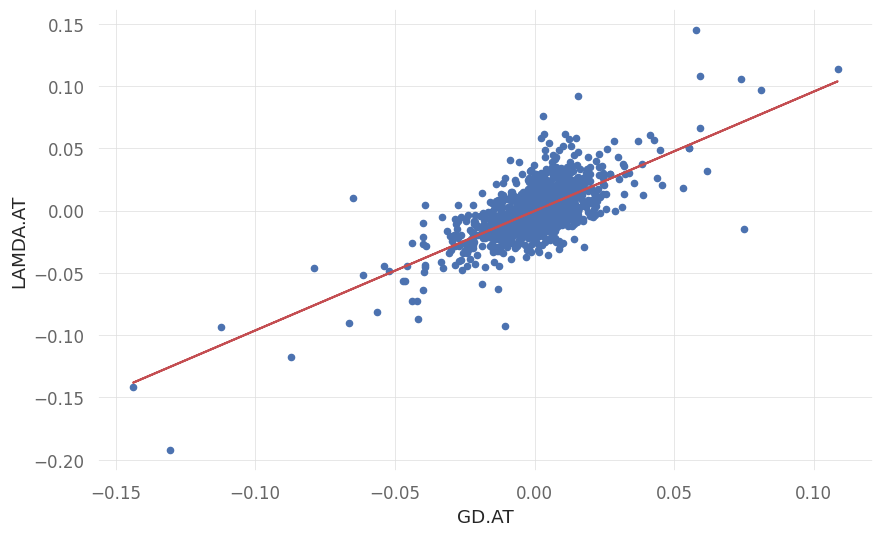

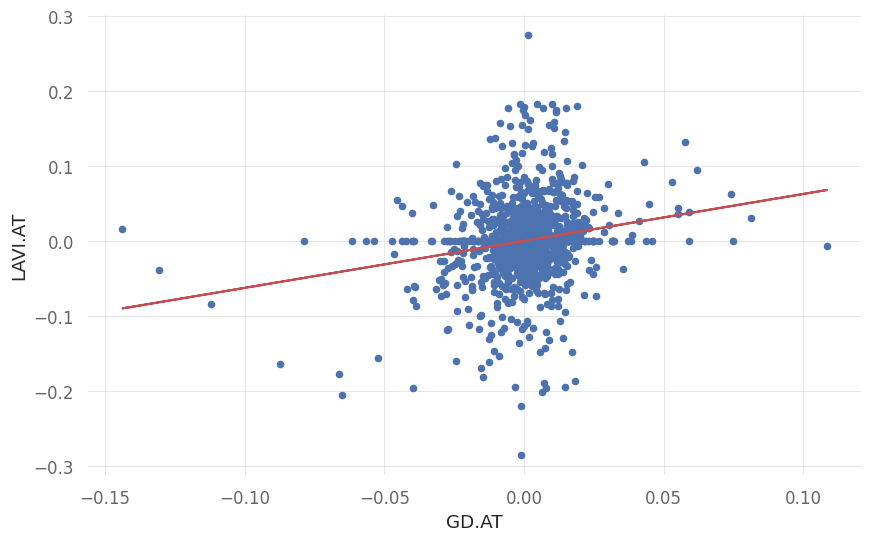

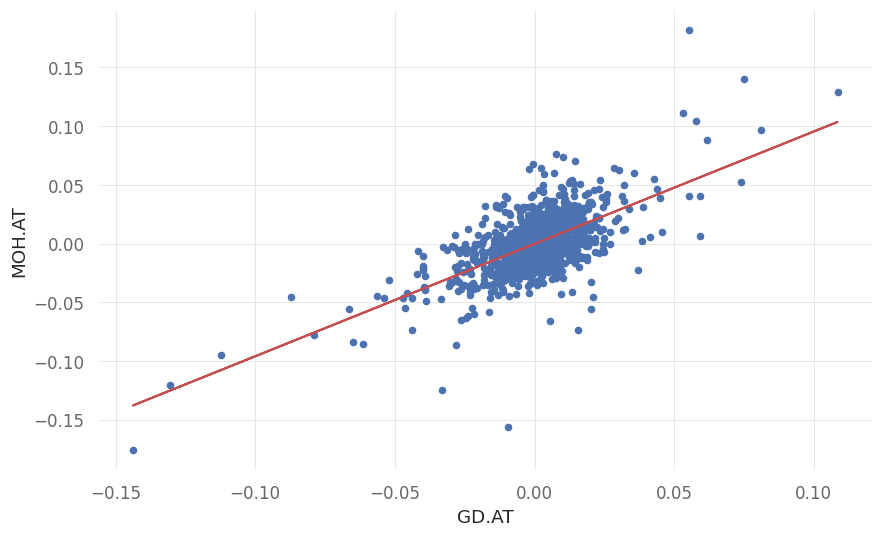

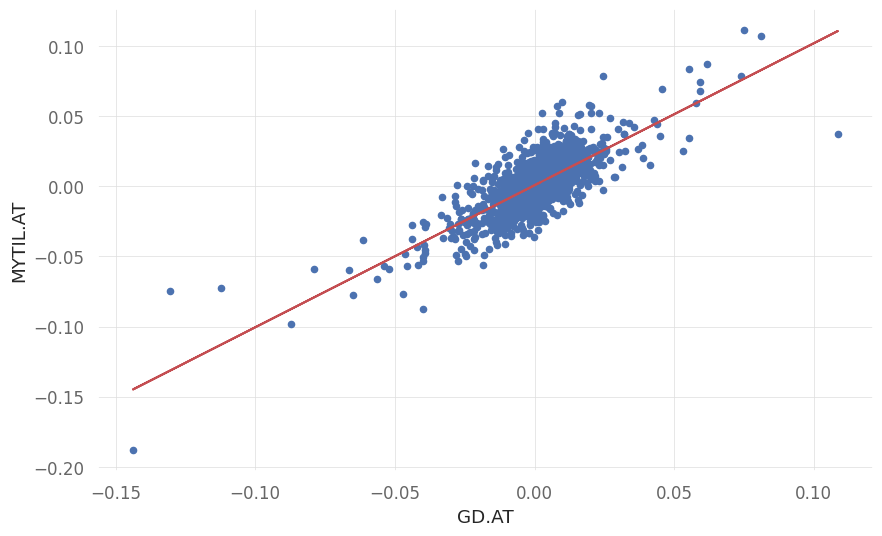

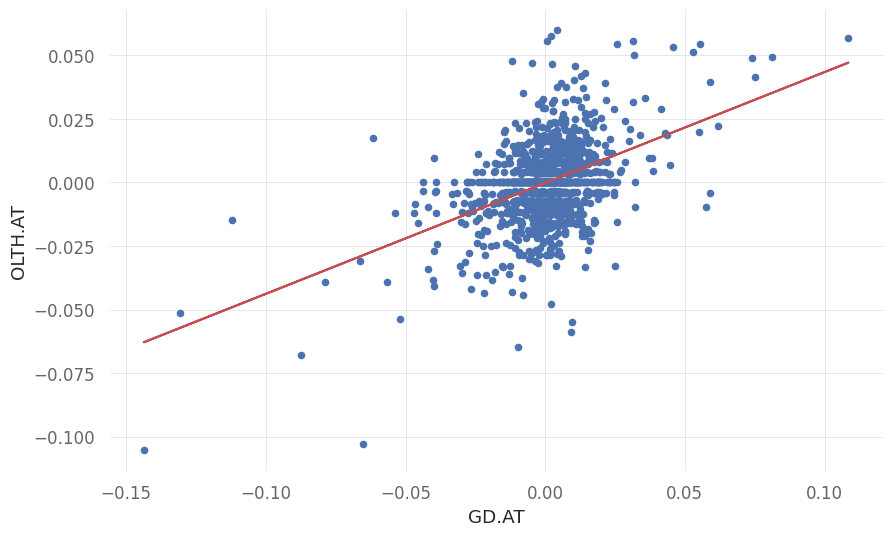

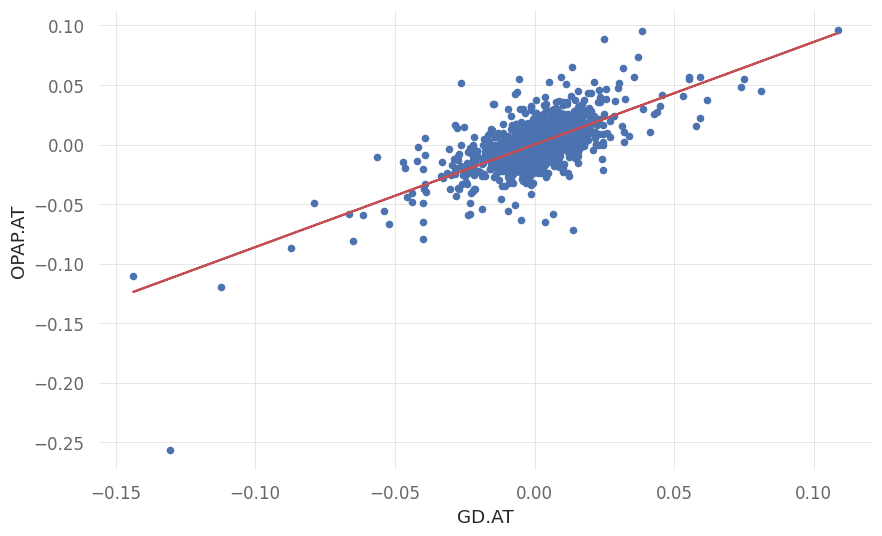

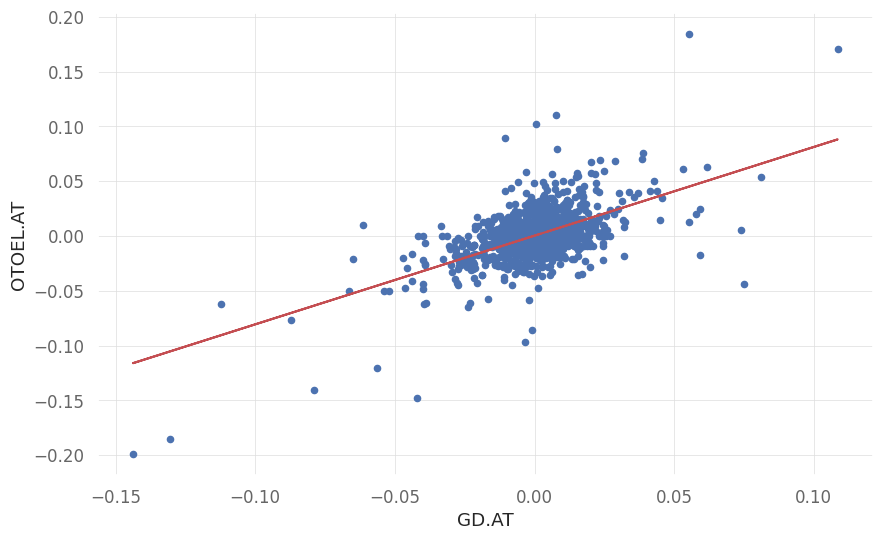

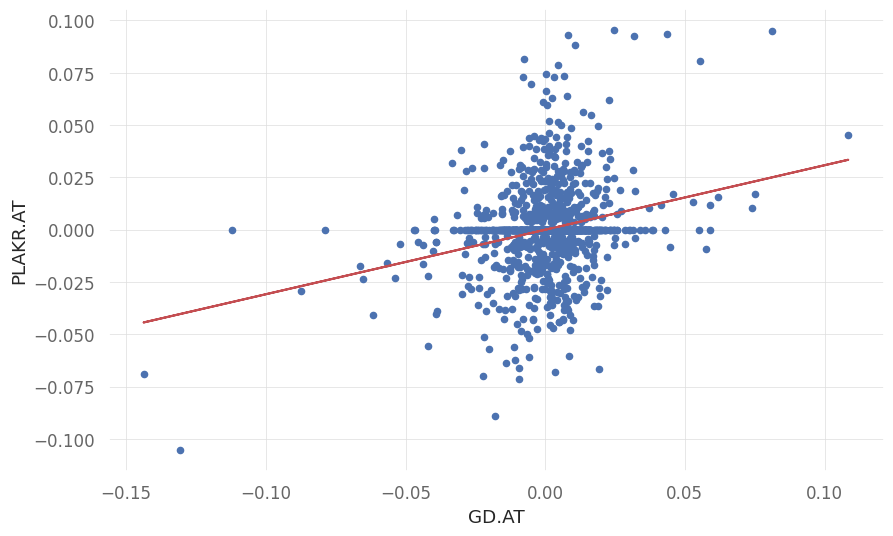

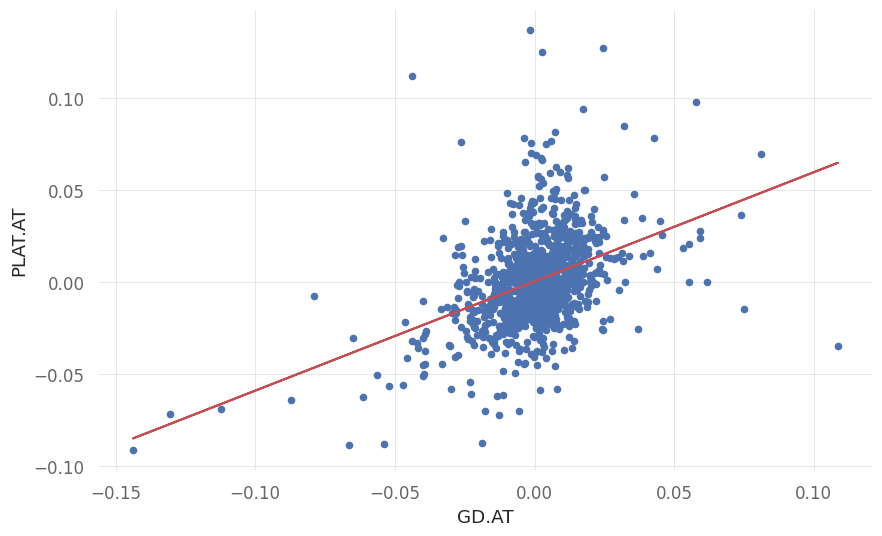

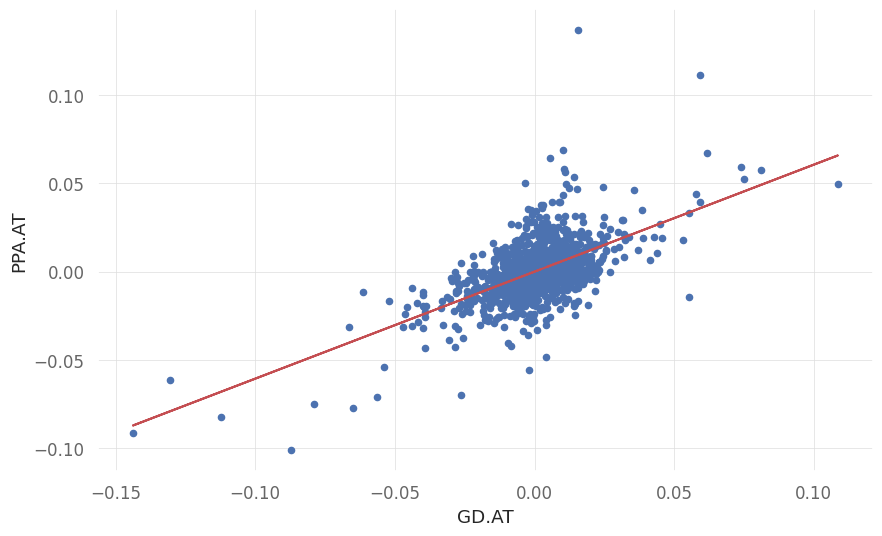

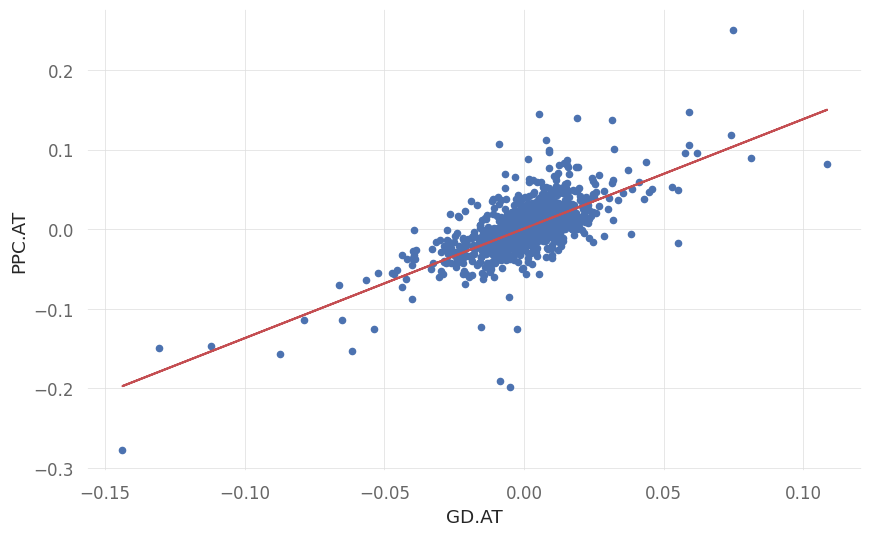

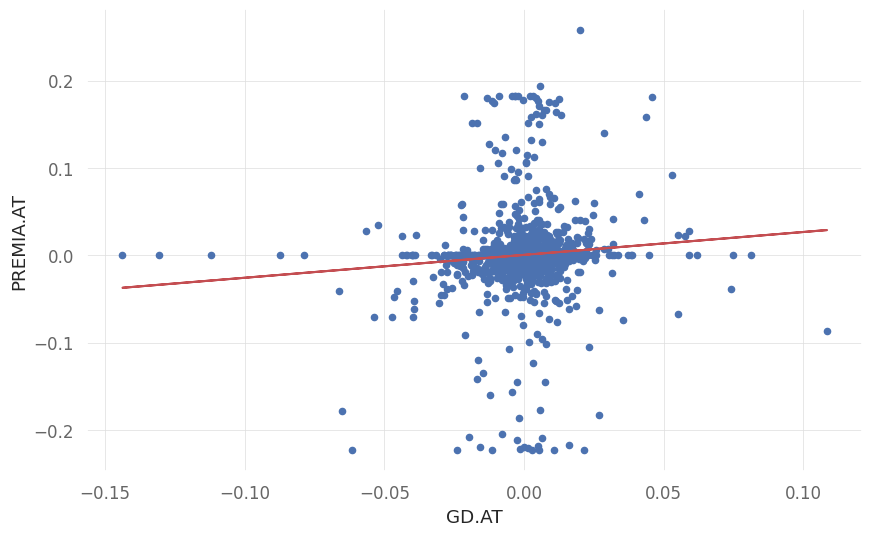

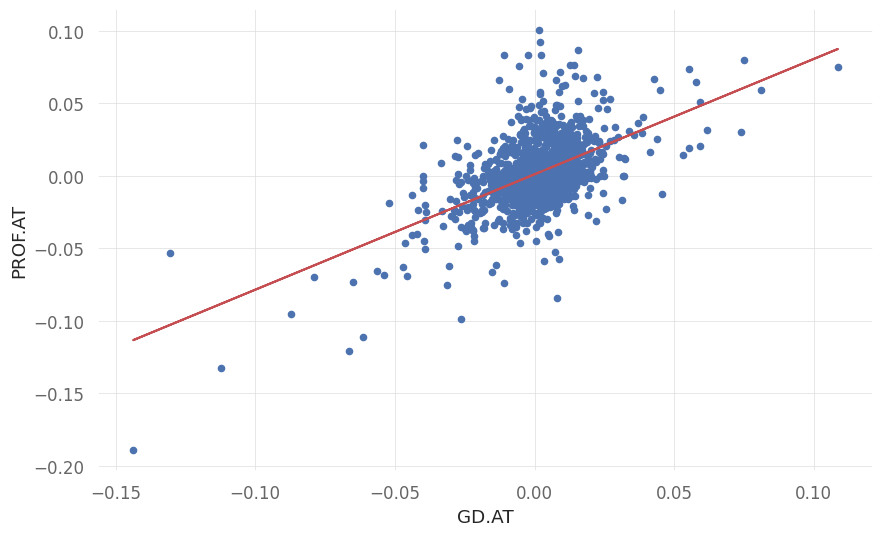

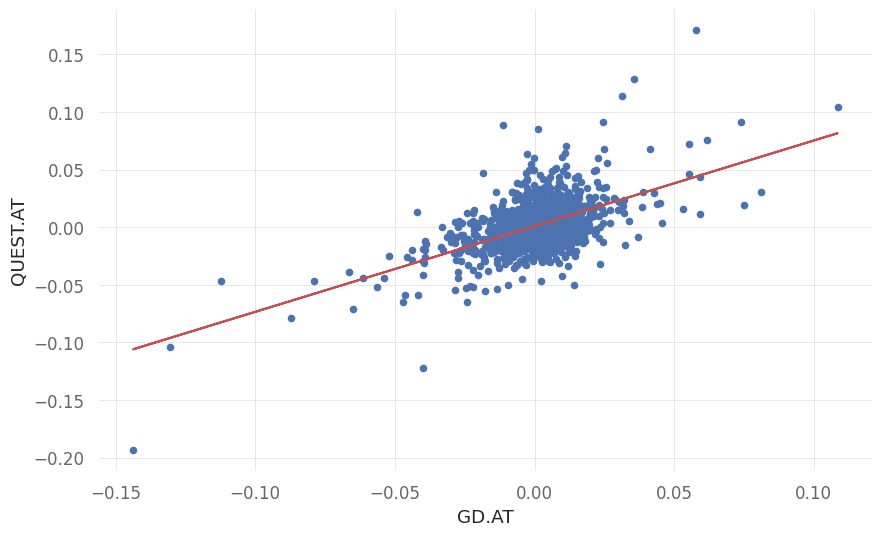

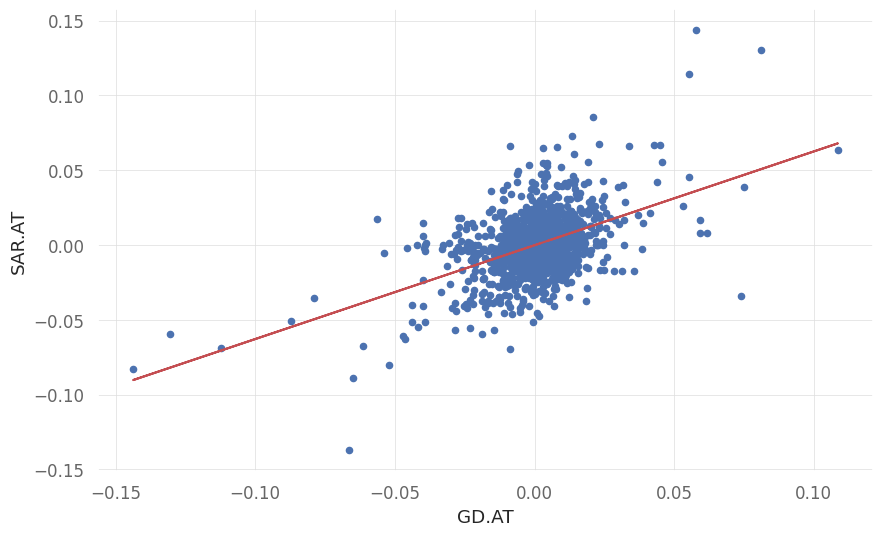

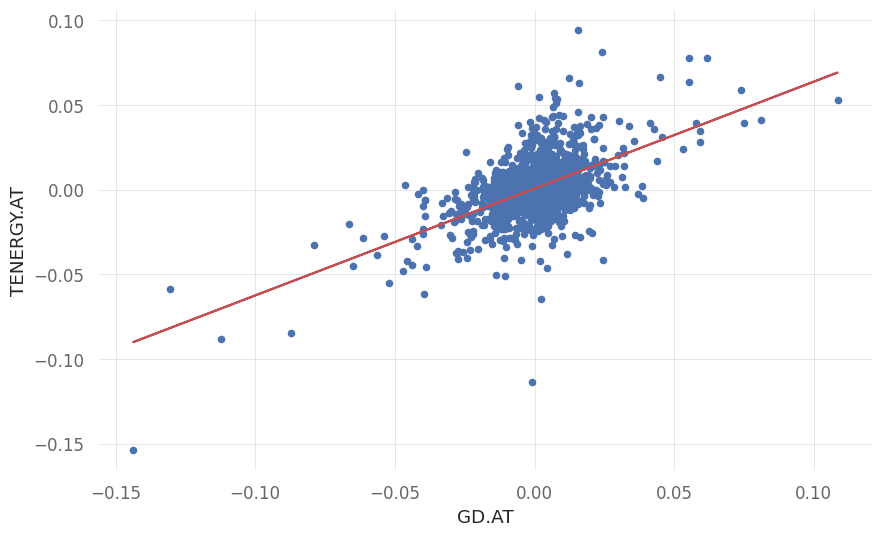

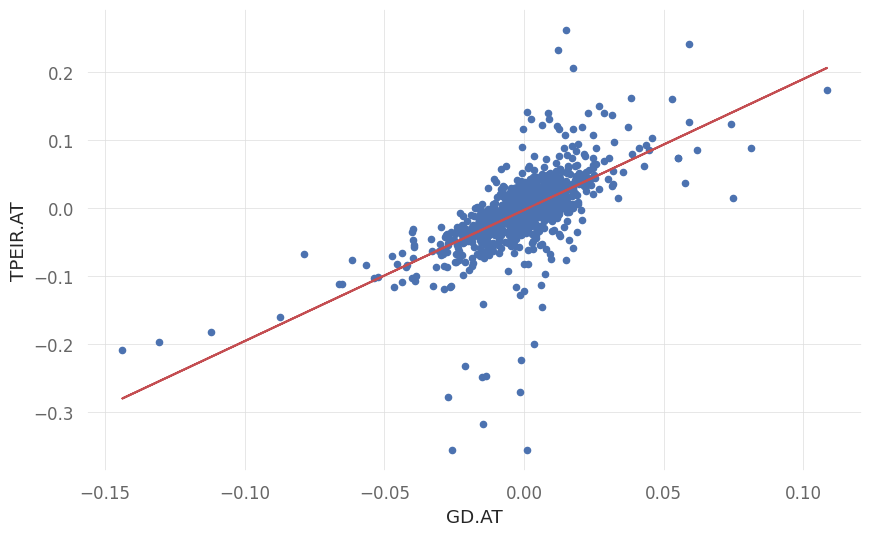

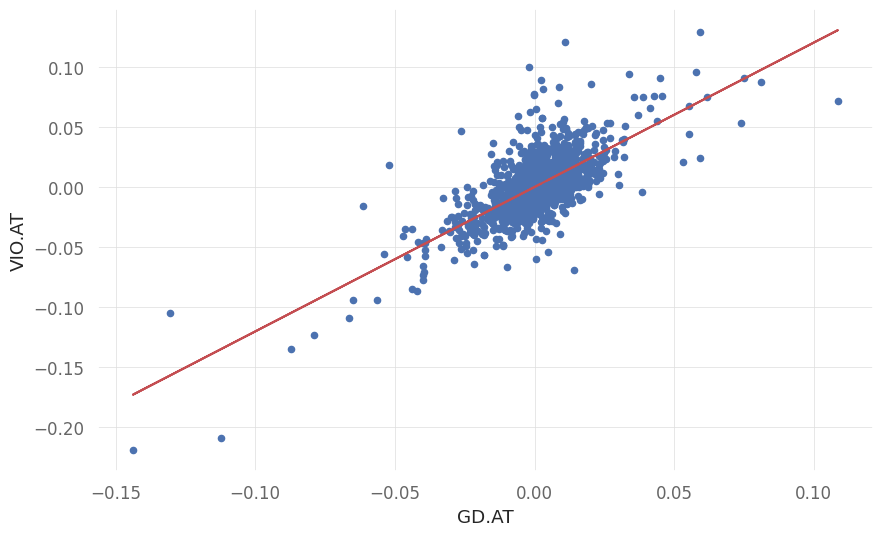

In [ ]:
# Add a 'Beta' column to the dataframe with beta values calculated relative to the 'GD.AT' index
df_ratios['Beta']=pd.Series(beta(returns_plus_index,'GD.AT'))

### Sector based data normalization

In [ ]:
def t_score_norm(df, column, cluster_column):
    """
    Performs t-score normalization on a specified column of the DataFrame, grouped by a cluster column.

    T-score normalization standardizes the values in the specified column based on the mean and standard deviation
    of groups defined by the cluster column. This method adjusts the values to reflect how many standard deviations
    they are from the group mean.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data to be normalized.
    column (str): The name of the column to normalize using t-scores.
    cluster_column (str): The name of the column used to group the data for normalization.

    Returns:
    pd.DataFrame: The DataFrame with an additional column containing the t-scores for the specified column.
    """

    # Calculate the mean, standard deviation, and size of each group
    group_means = df.groupby(cluster_column)[column].mean()
    group_std = df.groupby(cluster_column)[column].std()
    group_sizes = df.groupby(cluster_column)[column].size()

    # Initialize a list to store the t-scores
    comp_list = []

    # Calculate the t-score for each row in the DataFrame
    for i in df.index:
        group = df.loc[i, cluster_column]
        mean = group_means.loc[group]
        std = group_std.loc[group]
        size = group_sizes.loc[group]
        t_score = (df.loc[i, column] - mean) / (std - np.sqrt(size))
        comp_list.append(t_score)

    # Add the t-scores to the DataFrame as a new column
    name = column + ' t-Score'
    df[name] = pd.Series(comp_list)

    return df

In [ ]:
# Create a copy of the df_ratios DataFrame and normalize various financial ratios using t-score normalization based on 'Sector'
t_sector=df_ratios.copy()
t_score_norm(t_sector,'P/E','Sector')
t_score_norm(t_sector,'PBV','Sector')
t_score_norm(t_sector,'Current Ratio','Sector')
t_score_norm(t_sector,'Quick Ratio','Sector')
t_score_norm(t_sector,'Debt to Equity','Sector')
t_score_norm(t_sector,'Debt to Assets','Sector')
t_score_norm(t_sector,'Return On Assets','Sector')
t_score_norm(t_sector,'Return On Equity','Sector')



,Ticker,Volatility,Returns,Cluster,Sector,Liquidity,Capitalization,P/E,PBV,Current Ratio,...,Return On Equity,Beta,P/E t-Score,PBV t-Score,Current Ratio t-Score,Quick Ratio t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score
0,ADMIE.AT,0.019513,0.000271,0,Utilities,0.000992,4.695221e+08,8.066710,0.328447,1.210309,...,0.040716,0.874255,0.028222,0.837107,3.489991,3.524262,0.082096,-0.021958,0.000939,0.005106
1,AEGN.AT,0.028841,0.000428,4,Industrials,0.000400,4.666761e+08,4.320898,1.340629,1.154954,...,0.310266,1.104588,-0.269122,-0.076215,0.372736,0.265023,-0.590983,-0.045272,-0.007424,-0.051948
2,ALPHA.AT,0.036142,-0.000135,1,Financial Services,0.002203,2.350092e+09,6.378600,0.375215,NaN,...,0.058771,1.796058,-0.166244,0.221639,NaN,NaN,-0.074017,-0.004712,NaN,0.033399
3,AVAX.AT,0.032096,0.001341,1,Industrials,0.000490,1.171140e+08,3.073788,0.756012,1.061585,...,0.246012,1.071269,-0.924695,0.153792,0.420439,0.309458,-0.396579,0.001273,0.009952,-0.030029
4,BELA.AT,0.022772,0.000526,3,Consumer Cyclical,0.001694,1.950428e+09,7.845810,1.371742,6.203054,...,0.174842,0.836474,0.974537,-1.278485,-7.633178,-3.376571,0.814850,0.122772,-0.012605,-0.003210
5,CENER.AT,0.028240,0.001320,4,Industrials,0.000493,5.886752e+08,9.743603,1.723137,0.926277,...,0.176849,1.083137,2.581452,-0.226706,0.489570,0.598895,-0.070739,0.001036,0.001285,-0.006437
6,EEE.AT,0.020478,-0.000118,3,Consumer Defensive,0.000063,8.420848e+09,20.322035,2.487254,1.235973,...,0.122696,0.802833,-0.427134,-0.279252,0.437456,0.153188,-0.430776,-0.092453,-0.008294,-0.013465
7,ELHA.AT,0.024278,0.000406,3,Industrials,0.000252,5.943632e+08,3.731414,0.607503,1.926551,...,0.162807,0.982706,-0.578998,0.212221,-0.021482,0.506365,0.283072,-0.010318,-0.008347,-0.001647
8,ELLAKTOR.AT,0.032991,0.000340,1,Industrials,0.000359,5.469094e+08,1.100401,0.598680,1.706946,...,0.544042,1.019438,-1.962053,0.215692,0.090717,-0.044632,0.369846,0.016934,0.007660,-0.131694
9,ELPE.AT,0.020183,0.000132,3,Energy,0.000355,2.063612e+09,2.320234,0.756622,0.953898,...,0.326135,0.891968,-0.202228,0.031553,0.285667,0.293360,0.109017,0.020101,0.017244,0.047794


In [ ]:
# Clean and reorder columns in the DataFrame for a final scoring table
scoring_table_sector=t_sector.copy()

scoring_table_sector=scoring_table_sector.drop(['P/E','PBV','Current Ratio','Quick Ratio','Debt to Equity','Debt to Assets','Return On Assets','Return On Equity'],axis=1)
scoring_table_sector=scoring_table_sector.copy()

ic = scoring_table_sector.pop('Sector')
scoring_table_sector.insert(0, 'Sector', ic)

ic = scoring_table_sector.pop('Cluster')
scoring_table_sector.insert(0, 'Cluster', ic)

ic = scoring_table_sector.pop('Ticker')
scoring_table_sector.insert(0, 'Ticker', ic)

ic = scoring_table_sector.pop('Returns')
scoring_table_sector['Returns']=ic

ic = scoring_table_sector.pop('Current Ratio t-Score')
scoring_table_sector['Current Ratio t-Score']=ic

ic = scoring_table_sector.pop('Quick Ratio t-Score')
scoring_table_sector['Quick Ratio t-Score']=ic

ic = scoring_table_sector.pop('Liquidity')
scoring_table_sector['Liquidity']=ic

ic = scoring_table_sector.pop('Capitalization')
scoring_table_sector['Capitalization']=ic

ic = scoring_table_sector.pop('Beta')
scoring_table_sector['Beta']=ic


### Cluster based data normalization

In [ ]:
# Create a copy of the df_ratios DataFrame and normalize various financial ratios using t-score normalization based on 'Cluster'
t_cluster=df_ratios.copy()
t_score_norm(t_cluster,'P/E','Cluster')
t_score_norm(t_cluster,'PBV','Cluster')
t_score_norm(t_cluster,'Current Ratio','Cluster')
t_score_norm(t_cluster,'Quick Ratio','Cluster')
t_score_norm(t_cluster,'Debt to Equity','Cluster')
t_score_norm(t_cluster,'Debt to Assets','Cluster')
t_score_norm(t_cluster,'Return On Assets','Cluster')
t_score_norm(t_cluster,'Return On Equity','Cluster')

,Ticker,Volatility,Returns,Cluster,Sector,Liquidity,Capitalization,P/E,PBV,Current Ratio,...,Return On Equity,Beta,P/E t-Score,PBV t-Score,Current Ratio t-Score,Quick Ratio t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score
0,ADMIE.AT,0.019513,0.000271,0,Utilities,0.000992,4.695221e+08,8.066710,0.328447,1.210309,...,0.040716,0.874255,-0.472837,0.890873,2.134488,1.558746,-0.076108,-0.033238,0.012211,0.013872
1,AEGN.AT,0.028841,0.000428,4,Industrials,0.000400,4.666761e+08,4.320898,1.340629,1.154954,...,0.310266,1.104588,-2.617572,-0.173494,0.182621,-0.017799,-0.610443,-0.028524,-0.008823,-0.065790
2,ALPHA.AT,0.036142,-0.000135,1,Financial Services,0.002203,2.350092e+09,6.378600,0.375215,NaN,...,0.058771,1.796058,0.430030,0.194796,NaN,NaN,0.241655,0.053433,NaN,0.026344
3,AVAX.AT,0.032096,0.001341,1,Industrials,0.000490,1.171140e+08,3.073788,0.756012,1.061585,...,0.246012,1.071269,0.352647,0.030928,-60.583526,-22.311678,-0.688723,-0.055422,-0.009474,-0.041869
4,BELA.AT,0.022772,0.000526,3,Consumer Cyclical,0.001694,1.950428e+09,7.845810,1.371742,6.203054,...,0.174842,0.836474,0.112099,0.072563,-1.698065,-1.277323,0.181468,0.034291,-0.013980,0.005626
5,CENER.AT,0.028240,0.001320,4,Industrials,0.000493,5.886752e+08,9.743603,1.723137,0.926277,...,0.176849,1.083137,5.187619,-0.436312,0.341166,0.481629,0.273375,0.044791,0.004861,0.003980
6,EEE.AT,0.020478,-0.000118,3,Consumer Defensive,0.000063,8.420848e+09,20.322035,2.487254,1.235973,...,0.122696,0.802833,1.470376,-0.322256,0.222276,0.138902,-0.061588,-0.019028,0.010067,0.019624
7,ELHA.AT,0.024278,0.000406,3,Industrials,0.000252,5.943632e+08,3.731414,0.607503,1.926551,...,0.162807,0.982706,-0.335832,0.343055,-0.044711,0.253367,-0.062343,-0.030800,0.004116,0.008856
8,ELLAKTOR.AT,0.032991,0.000340,1,Industrials,0.000359,5.469094e+08,1.100401,0.598680,1.706946,...,0.544042,1.019438,0.306441,0.098632,-36.688813,-12.786039,0.111509,-0.038681,-0.011892,-0.150442
9,ELPE.AT,0.020183,0.000132,3,Energy,0.000355,2.063612e+09,2.320234,0.756622,0.953898,...,0.326135,0.891968,-0.489466,0.290276,0.331330,0.321372,-0.093977,-0.021511,-0.017892,-0.034986


In [ ]:
# Clean and reorder columns in the DataFrame for a final scoring table
scoring_table_cluster=t_cluster.copy()

scoring_table_cluster=scoring_table_cluster.drop(['P/E','PBV','Current Ratio','Quick Ratio','Debt to Equity','Debt to Assets','Return On Assets','Return On Equity'],axis=1)
scoring_table_cluster=scoring_table_cluster.copy()

ic = scoring_table_cluster.pop('Sector')
scoring_table_cluster.insert(0, 'Sector', ic)

ic = scoring_table_cluster.pop('Cluster')
scoring_table_cluster.insert(0, 'Cluster', ic)

ic = scoring_table_cluster.pop('Ticker')
scoring_table_cluster.insert(0, 'Ticker', ic)

ic = scoring_table_cluster.pop('Returns')
scoring_table_cluster['Returns']=ic

ic = scoring_table_cluster.pop('Current Ratio t-Score')
scoring_table_cluster['Current Ratio t-Score']=ic

ic = scoring_table_cluster.pop('Quick Ratio t-Score')
scoring_table_cluster['Quick Ratio t-Score']=ic

ic = scoring_table_cluster.pop('Liquidity')
scoring_table_cluster['Liquidity']=ic

ic = scoring_table_cluster.pop('Capitalization')
scoring_table_cluster['Capitalization']=ic

ic = scoring_table_cluster.pop('Beta')
scoring_table_cluster['Beta']=ic


In [ ]:
scoring_table_cluster

,Ticker,Cluster,Sector,Volatility,P/E t-Score,PBV t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score,Returns,Current Ratio t-Score,Quick Ratio t-Score,Liquidity,Capitalization,Beta
0,ADMIE.AT,0,Utilities,0.019513,-0.472837,0.890873,-0.076108,-0.033238,0.012211,0.013872,0.000271,2.134488,1.558746,0.000992,4.695221e+08,0.874255
1,AEGN.AT,4,Industrials,0.028841,-2.617572,-0.173494,-0.610443,-0.028524,-0.008823,-0.065790,0.000428,0.182621,-0.017799,0.000400,4.666761e+08,1.104588
2,ALPHA.AT,1,Financial Services,0.036142,0.430030,0.194796,0.241655,0.053433,NaN,0.026344,-0.000135,NaN,NaN,0.002203,2.350092e+09,1.796058
3,AVAX.AT,1,Industrials,0.032096,0.352647,0.030928,-0.688723,-0.055422,-0.009474,-0.041869,0.001341,-60.583526,-22.311678,0.000490,1.171140e+08,1.071269
4,BELA.AT,3,Consumer Cyclical,0.022772,0.112099,0.072563,0.181468,0.034291,-0.013980,0.005626,0.000526,-1.698065,-1.277323,0.001694,1.950428e+09,0.836474
5,CENER.AT,4,Industrials,0.028240,5.187619,-0.436312,0.273375,0.044791,0.004861,0.003980,0.001320,0.341166,0.481629,0.000493,5.886752e+08,1.083137
6,EEE.AT,3,Consumer Defensive,0.020478,1.470376,-0.322256,-0.061588,-0.019028,0.010067,0.019624,-0.000118,0.222276,0.138902,0.000063,8.420848e+09,0.802833
7,ELHA.AT,3,Industrials,0.024278,-0.335832,0.343055,-0.062343,-0.030800,0.004116,0.008856,0.000406,-0.044711,0.253367,0.000252,5.943632e+08,0.982706
8,ELLAKTOR.AT,1,Industrials,0.032991,0.306441,0.098632,0.111509,-0.038681,-0.011892,-0.150442,0.000340,-36.688813,-12.786039,0.000359,5.469094e+08,1.019438
9,ELPE.AT,3,Energy,0.020183,-0.489466,0.290276,-0.093977,-0.021511,-0.017892,-0.034986,0.000132,0.331330,0.321372,0.000355,2.063612e+09,0.891968


### Scoring

In [ ]:
def scoring(df):
    """
    Calculates and assigns scores to stocks by ranking various factors and normalizing the scores.

    This function processes a DataFrame with stock data, ranking the values in specified columns and assigning scores
    based on these rankings. It handles each column differently depending on whether higher or lower values are preferred.
    The final score for each stock is computed as the sum of its ranks across the given factors and then normalized.

    Parameters:
    df (pd.DataFrame): The DataFrame containing stock data with columns representing different factors to be ranked.

    Returns:
    pd.DataFrame: The DataFrame with additional columns for individual rankings and a final normalized score for each stock.
    """

    # Process columns where higher values are better (descending order)
    for column in df.columns[3:8]:
        # Fill missing values with the maximum value in the column
        df = df.apply(lambda col: col.fillna(col.max()))

        # Sort the DataFrame by the current column in descending order
        df = df.sort_values(by=column, ascending=False)

        # Assign ranks based on the sorted order
        df[column] = range(len(df))

    # Process columns where lower values are better (ascending order)
    for column in df.columns[8:]:
        # Fill missing values with the minimum value in the column
        df = df.apply(lambda col: col.fillna(col.min()))

        # Sort the DataFrame by the current column in ascending order
        df = df.sort_values(by=column)

        # Assign ranks based on the sorted order
        df[column] = range(len(df))

    # Calculate the total score by summing the ranks across the specified columns
    df['Score'] = df.iloc[:, 3:].sum(axis=1)

    # Sort the DataFrame by the total score in descending order
    df = df.sort_values(by='Score', ascending=False)

    # Normalize the 'Score' column
    #df['Score'] = normalize(df[['Score']], axis=0)

    return df


### Sector based scoring

In [ ]:
# Create the final scoring table for sector-based analysis, sorted from the highest to lowest stock scores
full_score_sector=scoring(scoring_table_sector)
full_score_sector=full_score_sector.reset_index()

In [ ]:
full_score_sector

,index,Ticker,Cluster,Sector,Volatility,P/E t-Score,PBV t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score,Returns,Current Ratio t-Score,Quick Ratio t-Score,Liquidity,Capitalization,Beta,Score
0,33,PPC.AT,1,Utilities,9,36,9,31,24,19,27,38,30,28,36,35,36,358
1,38,TENERGY.AT,0,Utilities,35,16,39,39,39,15,12,32,25,25,39,30,11,357
2,10,ETE.AT,1,Financial Services,4,29,19,25,22,32,11,29,39,36,35,36,39,356
3,2,ALPHA.AT,1,Financial Services,5,22,16,29,23,39,31,4,34,39,40,34,38,354
4,18,INKAT.AT,1,Industrials,12,39,33,37,27,30,37,33,23,18,31,5,28,353
5,11,EUROB.AT,1,Financial Services,6,30,22,33,26,37,7,22,35,33,27,37,37,352
6,39,TPEIR.AT,2,Financial Services,1,33,12,22,19,38,15,0,40,40,34,28,40,322
7,26,MYTIL.AT,3,Utilities,27,21,14,24,29,1,3,34,28,27,38,33,26,305
8,16,GEKTERNA.AT,4,Industrials,16,13,21,36,36,18,23,31,11,8,30,25,31,299
9,12,EXAE.AT,3,Financial Services,25,6,35,16,16,36,26,8,37,31,23,10,25,294


### Cluster based scoring

In [ ]:
# Create the final scoring table for cluster-based analysis, sorted from the highest to lowest stock scores
full_score_cluster=scoring(scoring_table_cluster)
full_score_cluster=full_score_cluster.reset_index()

In [ ]:
full_score_cluster

,index,Ticker,Cluster,Sector,Volatility,P/E t-Score,PBV t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score,Returns,Current Ratio t-Score,Quick Ratio t-Score,Liquidity,Capitalization,Beta,Score
0,38,TENERGY.AT,0,Utilities,35,17,39,38,39,23,17,32,31,30,39,30,11,381
1,17,HTO.AT,0,Communication Services,37,26,38,29,28,4,6,14,34,33,26,39,12,326
2,23,LAMDA.AT,3,Real Estate,23,40,13,31,21,34,38,9,26,23,17,27,23,325
3,0,ADMIE.AT,0,Utilities,33,30,1,28,31,28,24,16,33,32,25,19,20,320
4,33,PPC.AT,1,Utilities,9,38,20,23,23,14,37,38,2,2,36,35,36,313
5,11,EUROB.AT,1,Financial Services,6,15,19,18,8,36,11,22,38,38,27,37,37,312
6,18,INKAT.AT,1,Industrials,12,19,36,39,38,29,40,33,0,0,31,5,28,310
7,10,ETE.AT,1,Financial Services,4,14,18,5,5,38,12,29,36,36,35,36,39,307
8,26,MYTIL.AT,3,Utilities,27,25,15,25,18,16,16,34,18,15,38,33,26,306
9,16,GEKTERNA.AT,4,Industrials,16,7,14,35,32,24,36,31,12,9,30,25,31,302


### Diversification

In [ ]:
def diversification(ticker_sorted_list, ticker_returns):
    """
    Selects stocks to maximize portfolio diversification by prioritizing better-rated stocks and minimizing correlations.

    This function evaluates the correlation of stock returns to select stocks that are less correlated with each other,
    thereby enhancing portfolio diversification. Stocks are prioritized based on their ranking in the provided `ticker_sorted_list`,
    which is sorted in descending order of stock scores. The function selects stocks that have low correlations with previously chosen stocks.

    Parameters:
    ticker_sorted_list (list of str): List of stock tickers sorted by scores, with higher-rated stocks appearing first.
    ticker_returns (pd.DataFrame): DataFrame containing historical return data for the stocks, with tickers as columns.

    Returns:
    list of str: List of selected stock tickers that are minimally correlated with each other, ordered from the highest to the lowest rating.
    """

    # Select return data for the stocks in the sorted list
    new_ret = ticker_returns[ticker_sorted_list[:]]

    # Compute the correlation matrix of the selected stocks
    corr_matrix = new_ret.corr()

    # Create a mask to identify correlations less than 0.5
    mask = np.abs(corr_matrix) < 0.5

    # Initialize an empty list to store stocks that contribute to diversification
    selected_stocks = []

    # Iterate through each stock in the DataFrame
    for i in new_ret.columns:
        # Check if the current stock has correlations less than 0.5 with all previously selected stocks
        # Prioritize stocks appearing earlier in the sorted list
        if all(mask.loc[i, selected_stocks]):
            # If true, add the stock to the selected list
            selected_stocks.append(i)

    return selected_stocks


In [ ]:
# Convert the 'Ticker' column of the sector scoring table to a list of tickers
ls_sector=full_score_sector['Ticker'].tolist()

# Convert the 'Ticker' column of the cluster scoring table to a list of tickers
ls_cluster=full_score_cluster['Ticker'].tolist()

# Create a list of selected stock tickers that are minimally correlated with each other, sorted from the best-rated to the worst(sector-based analysis)
final_stocks_sector=diversification(ls_sector,returns)

# Create a list of selected stock tickers that are minimally correlated with each other, sorted from the best-rated to the worst(cluster-based analysis).
final_stocks_cluster=diversification(ls_cluster,returns)


In [ ]:
# Set 'Ticker' column as index
full_score_sector.set_index('Ticker',inplace=True)
full_score_cluster.set_index('Ticker',inplace=True)


In [ ]:
final_stocks_sector

['PPC.AT',
 'TENERGY.AT',
 'ALPHA.AT',
 'INKAT.AT',
 'EEE.AT',
 'HTO.AT',
 'INLOT.AT',
 'AVAX.AT',
 'AEGN.AT',
 'OPAP.AT',
 'FOYRK.AT',
 'QUEST.AT',
 'MOH.AT',
 'KRI.AT',
 'PREMIA.AT',
 'BELA.AT',
 'INTEK.AT',
 'PLAKR.AT',
 'ELLAKTOR.AT',
 'PLAT.AT',
 'PROF.AT',
 'EYDAP.AT',
 'LAVI.AT',
 'SAR.AT',
 'PPA.AT',
 'EYAPS.AT',
 'OLTH.AT']

In [ ]:
final_stocks_sector_score=full_score_sector.loc[final_stocks_sector]
final_stocks_cluster_score=full_score_cluster.loc[final_stocks_cluster]

In [ ]:
#show the final scoring table for the sector-based analysis
final_stocks_sector_score


,index,Cluster,Sector,Volatility,P/E t-Score,PBV t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score,Returns,Current Ratio t-Score,Quick Ratio t-Score,Liquidity,Capitalization,Beta,Score
Ticker,,,,,,,,,,,,,,,,,
PPC.AT,33,1,Utilities,9,36,9,31,24,19,27,38,30,28,36,35,36,358
TENERGY.AT,38,0,Utilities,35,16,39,39,39,15,12,32,25,25,39,30,11,357
ALPHA.AT,2,1,Financial Services,5,22,16,29,23,39,31,4,34,39,40,34,38,354
INKAT.AT,18,1,Industrials,12,39,33,37,27,30,37,33,23,18,31,5,28,353
EEE.AT,6,3,Consumer Defensive,30,25,31,35,38,10,13,5,20,14,1,40,16,278
HTO.AT,17,0,Communication Services,37,2,3,2,1,33,38,14,38,30,26,39,12,275
INLOT.AT,19,2,Consumer Cyclical,3,40,2,40,40,22,36,3,16,11,12,12,35,272
AVAX.AT,3,1,Industrials,11,35,20,34,20,23,8,37,19,17,14,2,29,269
AEGN.AT,1,4,Industrials,13,24,28,38,35,11,5,21,18,15,10,17,32,267


In [ ]:
#show the final scoring table for the cluster-based analysis
final_stocks_cluster_score

,index,Cluster,Sector,Volatility,P/E t-Score,PBV t-Score,Debt to Equity t-Score,Debt to Assets t-Score,Return On Assets t-Score,Return On Equity t-Score,Returns,Current Ratio t-Score,Quick Ratio t-Score,Liquidity,Capitalization,Beta,Score
Ticker,,,,,,,,,,,,,,,,,
TENERGY.AT,38,0,Utilities,35,17,39,38,39,23,17,32,31,30,39,30,11,381
HTO.AT,17,0,Communication Services,37,26,38,29,28,4,6,14,34,33,26,39,12,326
LAMDA.AT,23,3,Real Estate,23,40,13,31,21,34,38,9,26,23,17,27,23,325
PPC.AT,33,1,Utilities,9,38,20,23,23,14,37,38,2,2,36,35,36,313
EUROB.AT,11,1,Financial Services,6,15,19,18,8,36,11,22,38,38,27,37,37,312
INKAT.AT,18,1,Industrials,12,19,36,39,38,29,40,33,0,0,31,5,28,310
OTOEL.AT,29,3,Consumer Cyclical,21,24,22,34,37,17,14,27,29,25,16,18,17,301
OPAP.AT,28,3,Consumer Cyclical,29,20,37,24,22,0,1,19,23,17,29,38,19,278
EEE.AT,6,3,Consumer Defensive,30,4,31,26,24,25,27,5,24,22,1,40,16,275
